In [4]:
!git clone https://github.com/BrenooOliveira/AulasFatec.git

Cloning into 'AulasFatec'...
remote: Enumerating objects: 277, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (181/181), done.
remote: Total 277 (delta 112), reused 230 (delta 78), pack-reused 0 (from 0)
Receiving objects: 100% (277/277), 11.20 MiB | 33.74 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [39]:
# Instalar bibliotecas (caso necessário)
# !pip install networkx matplotlib pandas

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv("/content/AulasFatec/SeminarioEstruturaDeDados/Grafos/social media influencers - instagram.csv")
df

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K


In [ ]:
# Limpeza de colunas e dados
df.columns = [col.strip().replace('\r', '').replace('\n', '') for col in df.columns]
df['Audience country(mostly)'] = df['Audience country(mostly)'].str.strip()

In [32]:
# Criar o grafo
G = nx.Graph()


In [33]:
# Adicionar nós (influenciadores com país de audiência)
for idx, row in df.iterrows():
    nome = row['instagram name']
    pais = row['Audience country(mostly)']
    G.add_node(nome, pais=pais)

In [34]:
# Adicionar arestas: conecta influenciadores com o mesmo país
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        nome_i = df.loc[i, 'instagram name']
        nome_j = df.loc[j, 'instagram name']
        pais_i = df.loc[i, 'Audience country(mostly)']
        pais_j = df.loc[j, 'Audience country(mostly)']
        if pais_i == pais_j and pd.notna(pais_i):
            G.add_edge(nome_i, nome_j, pais=pais_i)

In [35]:
print(f"Grafo criado com {G.number_of_nodes()} influenciadores e {G.number_of_edges()} conexões.")

Grafo criado com 976 influenciadores e 69176 conexões.


🌐 720 influenciadores compartilham o mesmo país de audiência com 'Justin Bieber' (via BFS).
🧭 DFS também encontra 720 influenciadores conectados a 'Justin Bieber'.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


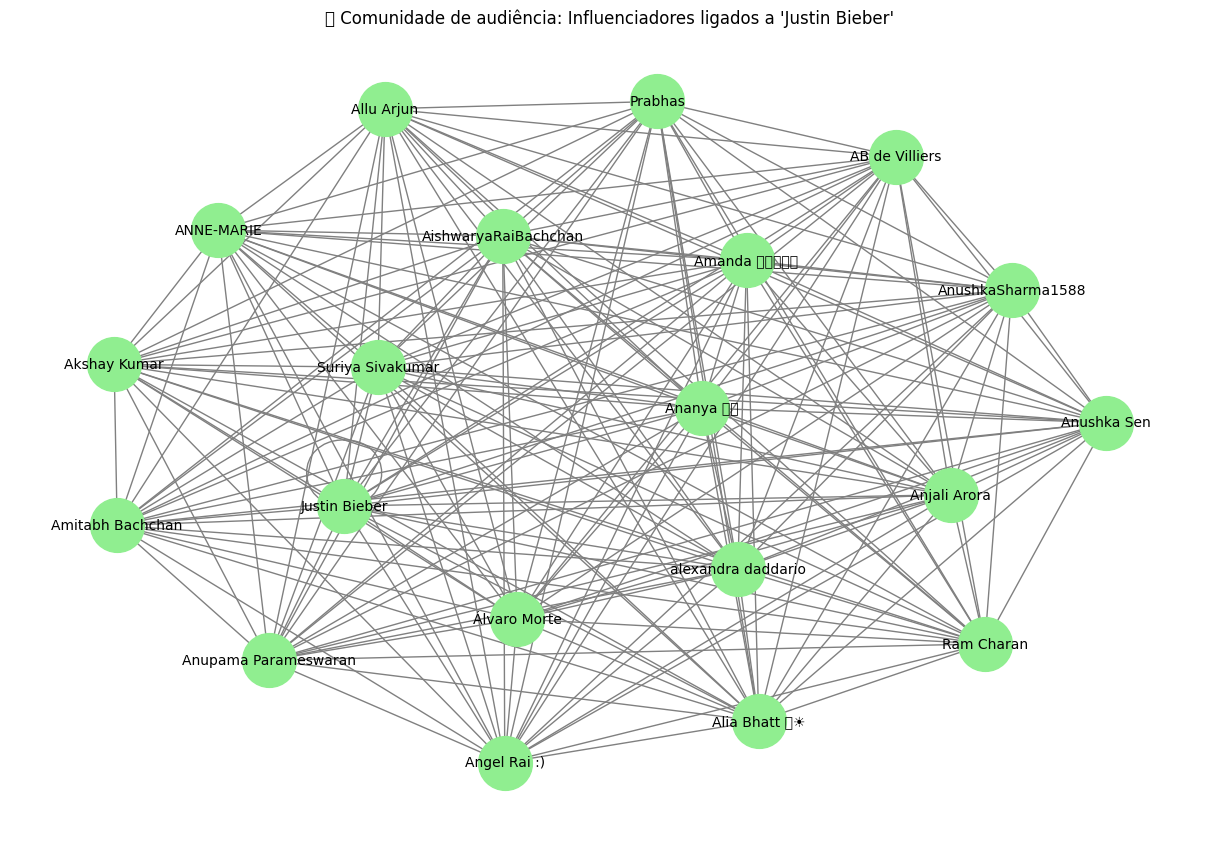

In [38]:
influencer_exemplo = 'Justin Bieber'

if influencer_exemplo in G.nodes:
    # Imagine que estamos começando com uma celebridade global: Justin Bieber.
    # Nosso objetivo é descobrir quem mais compartilha o mesmo público predominante que ele.

    # 🔎 Passo 1: Usamos o algoritmo de Busca em Largura (BFS)
    # Ele simula uma "onda de conexões", alcançando influenciadores camada por camada.
    bfs_nodes = list(nx.bfs_tree(G, influencer_exemplo).nodes)
    print(f"🌐 {len(bfs_nodes)} influenciadores compartilham o mesmo país de audiência com '{influencer_exemplo}' (via BFS).")

    # 🔎 Passo 2: Repetimos com Busca em Profundidade (DFS)
    # Esse algoritmo mergulha fundo nas conexões antes de voltar.
    dfs_nodes = list(nx.dfs_tree(G, influencer_exemplo).nodes)
    print(f"🧭 DFS também encontra {len(dfs_nodes)} influenciadores conectados a '{influencer_exemplo}'.")

    # 🎯 A ideia aqui é que, independente da abordagem, estamos mapeando uma *comunidade de público*.
    # Isso é útil para estratégias de marketing ou análise de influência regional.

    # 🎨 Passo 3: Visualizamos uma parte dessa rede — os 20 primeiros conectados
    sub_nodes = bfs_nodes[:20]
    subgraph = G.subgraph(sub_nodes)

    pos = nx.spring_layout(subgraph, seed=42)
    plt.figure(figsize=(12, 8))
    nx.draw(subgraph, pos, with_labels=True, node_color='lightgreen', node_size=1500, font_size=10, edge_color='gray')
    plt.title(f"🔗 Comunidade de audiência: Influenciadores ligados a '{influencer_exemplo}'")
    plt.axis('off')
    plt.show()

    # 📌 Conclusão parcial: mesmo partindo de uma celebridade mundial,
    # conseguimos identificar um grupo de influenciadores que compartilham características geográficas do público.
else:
    print(f"❌ Influenciador '{influencer_exemplo}' não encontrado no grafo.")


In [41]:
%cd AulasFatec/

/content/AulasFatec


In [42]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [49]:
%cd SeminarioEstruturaDeDados/Grafos

/content/AulasFatec/SeminarioEstruturaDeDados/Grafos


In [54]:
%ls /

bin@                        lib32@                    root/
boot/                       lib64@                    run/
content/                    libx32@                   sbin@
cuda-keyring_1.1-1_all.deb  media/                    srv/
datalab/                    mnt/                      sys/
dev/                        NGC-DL-CONTAINER-LICENSE  tmp/
etc/                        opt/                      tools/
home/                       proc/                     usr/
kaggle/                     python-apt/               var/
lib@                        python-apt.tar.xz*


In [55]:
import os

notebook_path = os.path.basename(os.getcwd()) + ".ipynb"
print("Nome provável do seu notebook:", notebook_path)


Nome provável do seu notebook: Grafos.ipynb


In [56]:
import shutil

# Salva uma cópia do notebook atual dentro do repositório clonado
shutil.copy("/content/Grafos.ipynb", "/content/AulasFatec/SeminarioEstruturaDeDados/Grafos/")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Grafos.ipynb'